In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = pd.DataFrame(df, columns=['revenue', 'title'])
data_sorted = data.sort_values(by='revenue', ascending=False)
data_sorted['revenue'] = data_sorted['revenue'] / 1000000
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('title', inplace=True)
ranking = data_sorted.head(10)

In [4]:
# Variables
index = ranking.index
values = ranking['revenue']
plot_title = 'Top 10 movies by revenue, USD million'
title_size = 18
subtitle = 'Source: Kaggle / The Movies Dataset'
x_label = 'Revenue, USD million'
filename = 'barh-plot'

<ipython-input-5-c95517b9c08e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.sort_values(by='revenue', inplace=True, ascending=True)


<IPython.core.display.Javascript object>


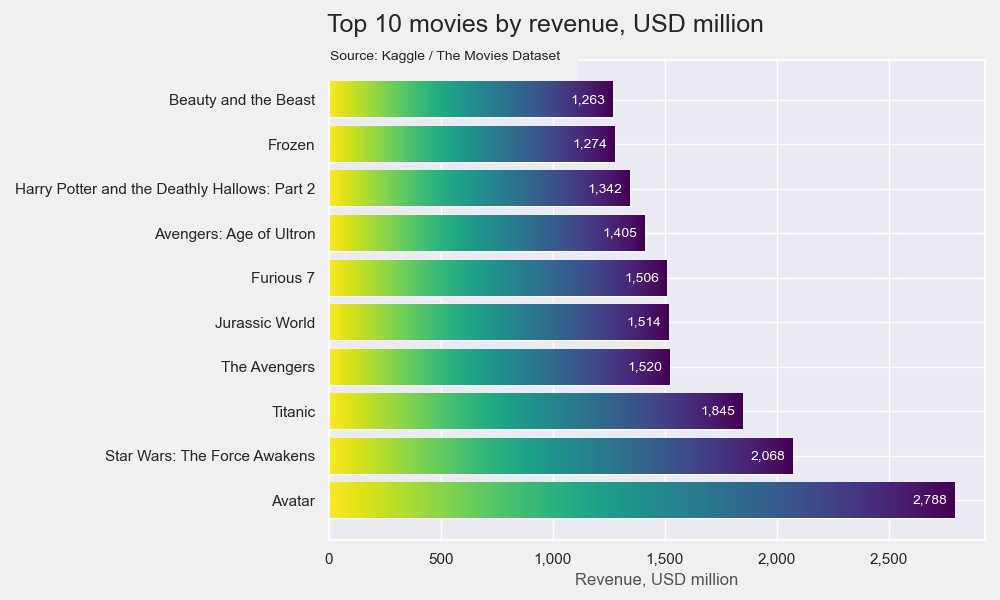

Text(0.5, 33.249999999999986, 'Revenue, USD million')

In [5]:
# Sort values for plotting
ranking.sort_values(by='revenue', inplace=True, ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

# Create bars
bar = ax.barh(index, values)
plt.tight_layout()
# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])

# Adjust subplots
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(bottom=0.1)

# Create gradient background
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Set labels
rects = ax.patches
# For each bar: place a label
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white

# Set subtitle
trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=trans, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252')

In [6]:
plt.savefig(filename+'.png', facecolor=(.94, .94, .94))